In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv('/content/drive/MyDrive/Intellipaat Datasets/Projects/Chatgpt Tweets Sentiment Analysis/chatgpt1.csv')

In [6]:
df.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


In [7]:
df.shape

(50001, 20)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Datetime              0
Tweet Id              0
Text                  0
Username              0
Permalink             0
User                  0
Outlinks          30059
CountLinks        30059
ReplyCount            0
RetweetCount          0
LikeCount             0
QuoteCount            0
ConversationId        0
Language              0
Source                0
Media             40499
QuotedTweet       46438
MentionedUsers    32832
hashtag               0
hastag_counts         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Datetime        50001 non-null  object
 1   Tweet Id        50001 non-null  int64 
 2   Text            50001 non-null  object
 3   Username        50001 non-null  object
 4   Permalink       50001 non-null  object
 5   User            50001 non-null  object
 6   Outlinks        19942 non-null  object
 7   CountLinks      19942 non-null  object
 8   ReplyCount      50001 non-null  int64 
 9   RetweetCount    50001 non-null  int64 
 10  LikeCount       50001 non-null  int64 
 11  QuoteCount      50001 non-null  int64 
 12  ConversationId  50001 non-null  int64 
 13  Language        50001 non-null  object
 14  Source          50001 non-null  object
 15  Media           9502 non-null   object
 16  QuotedTweet     3563 non-null   object
 17  MentionedUsers  17169 non-null  object
 18  hashta

In [11]:
df.describe()

,Tweet Id,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,hastag_counts
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,5.000100e+04,50001.000000
mean,1.617493e+18,0.929141,1.498510,9.696326,0.219536,1.617205e+18,0.783304
std,1.725682e+14,23.251710,46.030058,313.524215,10.356329,1.005075e+16,1.975040
min,1.617156e+18,0.000000,0.000000,0.000000,0.000000,6.493609e+17,0.000000
25%,1.617354e+18,0.000000,0.000000,0.000000,0.000000,1.617302e+18,0.000000
50%,1.617525e+18,0.000000,0.000000,0.000000,0.000000,1.617504e+18,0.000000
75%,1.617625e+18,1.000000,0.000000,2.000000,0.000000,1.617607e+18,1.000000
max,1.617779e+18,3098.000000,6815.000000,56073.000000,1947.000000,1.617779e+18,28.000000


In [12]:
df.nunique()

Datetime          41559
Tweet Id          50001
Text              49555
Username          38433
Permalink         50001
User              38433
Outlinks          13769
CountLinks        19485
ReplyCount          108
RetweetCount        138
LikeCount           366
QuoteCount           51
ConversationId    41430
Language             61
Source              843
Media              9401
QuotedTweet        2040
MentionedUsers    10704
hashtag            7312
hastag_counts        27
dtype: int64

In [13]:
def most_frequent_values(data):
    total = data.count()  # Calculate total non-null values for each column
    tt = pd.DataFrame(total)  # Create a new DataFrame with total values
    tt.columns = ['Total']  # Rename the column in the DataFrame to 'Total'
    items = []  # Initialize an empty list to store most frequent items
    vals = []  # Initialize an empty list to store frequencies
    for col in data.columns:  # Loop through each column in the input DataFrame
        try:
            itm = data[col].value_counts().index[0]  # Calculate most frequent item
            val = data[col].value_counts().values[0]  # Calculate frequency of most frequent item
            items.append(itm)  # Append most frequent item to items list
            vals.append(val)  # Append frequency to vals list
        except Exception as ex:  # Handle exceptions that may occur during calculation
            print(ex)  # Print exception message for debugging
            items.append(0)  # Append 0 to items list in case of exception
            vals.append(0)  # Append 0 to vals list in case of exception
            continue  # Skip to next iteration of loop in case of exception
    tt['Most frequent item'] = items  # Add a new column to DataFrame for most frequent items
    tt['Frequency'] = vals  # Add a new column to DataFrame for frequencies
    tt['Percent from total'] = np.round(vals / total * 100, 3)  # Calculate percentage from total and add as new column
    return(np.transpose(tt))  # Transpose the DataFrame and return it


In [14]:
most_frequent_values(df)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
Total,50001,50001,50001,50001,50001,50001,19942,19942,50001,50001,50001,50001,50001,50001,50001,9502,3563,17169,50001,50001
Most frequent item,2023-01-23 17:11:13+00:00,1617156270871699456,@chatgpt_issac AI,translation_ja,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/translation_ja,['https://www.ft.com/content/7229ba86-142a-49f...,['https://t.co/xegxY3jDom'],0,0,0,0,1617162355112124421,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/GRDecter/status/1617162355...,"[User(username='GRDecter', id=1281457267582177...",[],0
Frequency,8,1,164,60,1,60,149,19,36736,42416,27141,47665,264,32076,17814,20,209,332,36414,36414
Percent from total,0.016,0.002,0.328,0.12,0.002,0.12,0.747,0.095,73.471,84.83,54.281,95.328,0.528,64.151,35.627,0.21,5.866,1.934,72.827,72.827


In [15]:
# Get unique values in the 'Username' column of DataFrame 'df'
df['Username'].unique()


array(['mochico0123', 'Caput_LupinumSG', 'ciffi', ..., 'marcopiccinini',
       'EuniceNyandat', 'AmericoSD_69'], dtype=object)

In [16]:
# Calculate the count of occurrences for each unique value in the 'Username' column of the DataFrame
# and return the result as a Series with the unique values as index and the counts as values
username_counts = df['Username'].value_counts()


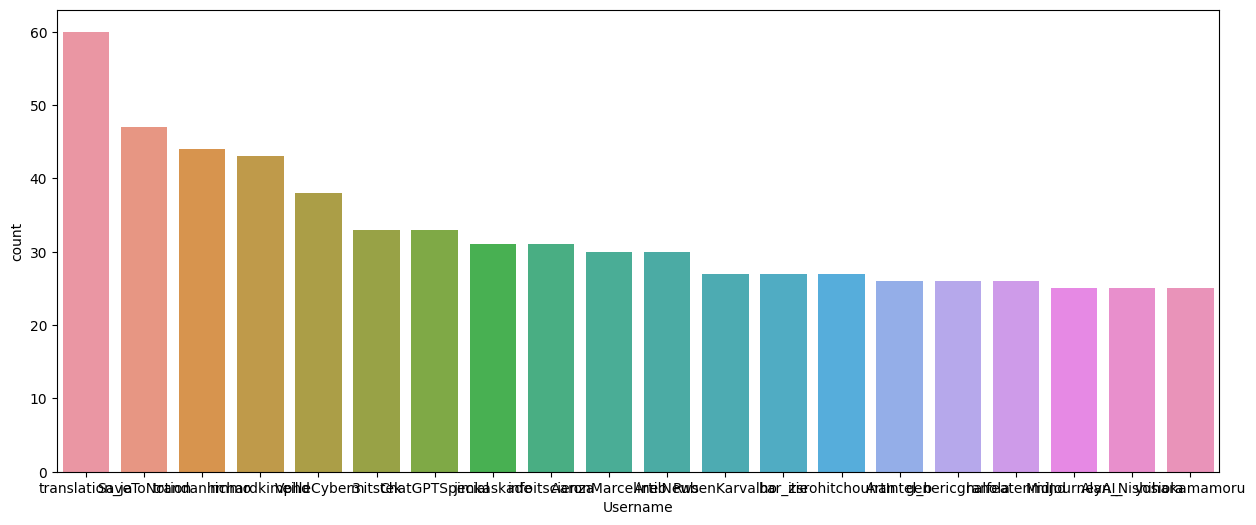

In [31]:
plt.figure(figsize=(15,6))  # Creating a new figure with a width of 15 units and a height of 6 units

# The 'order' parameter specifies the order of bars on the x-axis, which is determined by the most frequent values
# The 'index[:20]' part selects the top 20 most frequent values from the 'Username' column
sns.countplot(data=df, x='Username', order=df["Username"].value_counts().index[:20])

plt.show()  # Displaying the plot

In [18]:
# Get unique values in the 'User' column of DataFrame df
df['User'].unique()


array(['https://twitter.com/mochico0123',
       'https://twitter.com/Caput_LupinumSG', 'https://twitter.com/ciffi',
       ..., 'https://twitter.com/marcopiccinini',
       'https://twitter.com/EuniceNyandat',
       'https://twitter.com/AmericoSD_69'], dtype=object)

In [19]:
# Retrieve the count of occurrences of each unique value in the 'User' column of the DataFrame
df['User'].value_counts()


https://twitter.com/translation_ja    60
https://twitter.com/SaveToNotion      47
https://twitter.com/trandanhmmo       44
https://twitter.com/richardkimphd     43
https://twitter.com/VeilleCyber3      38
                                      ..
https://twitter.com/masayume_32        1
https://twitter.com/WRoughSketch       1
https://twitter.com/ayazfarooqui       1
https://twitter.com/Technology_GD      1
https://twitter.com/AmericoSD_69       1
Name: User, Length: 38433, dtype: int64

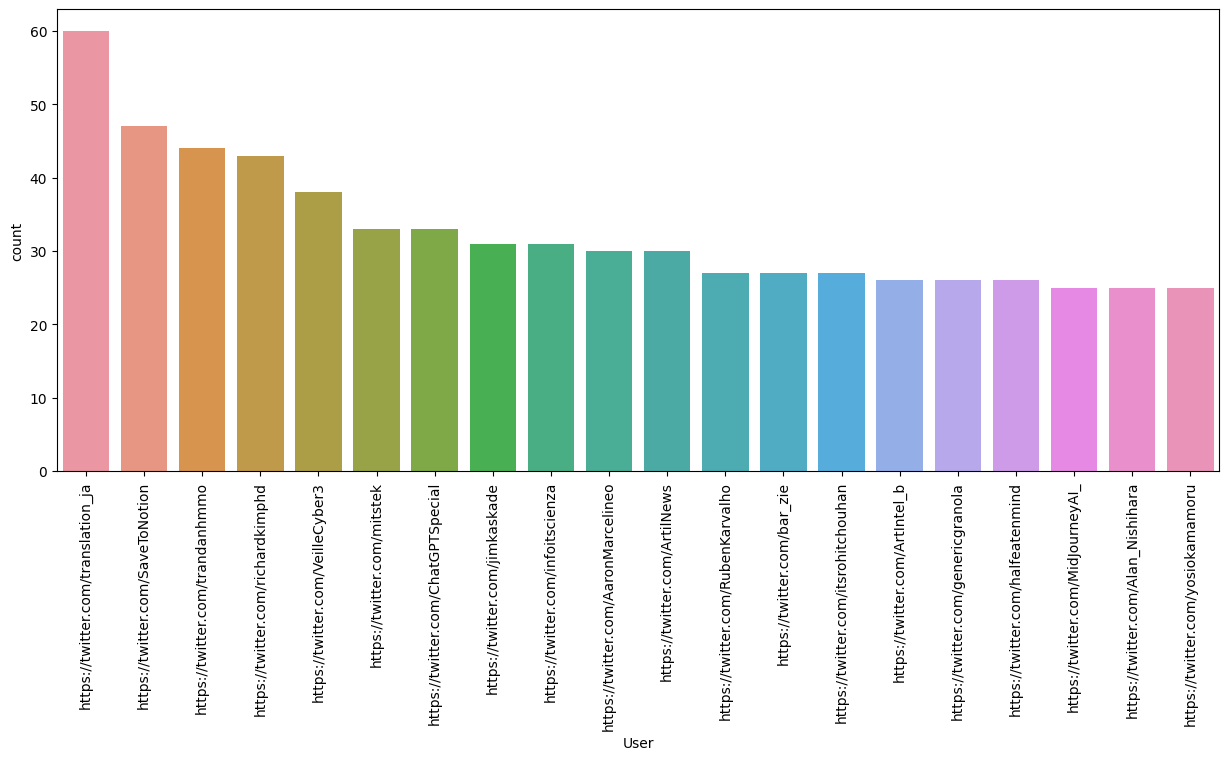

In [20]:
# Create a figure with a size of 15 inches by 6 inches
plt.figure(figsize=(15,6))

# Order the bars on the x-axis based on the counts of each category, limited to the top 20 categories
sns.countplot(data=df, x='User', order=df['User'].value_counts().index[:20])

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [21]:
# Retrieve the unique values in the 'ReplyCount' column of the DataFrame 'df'
df['ReplyCount'].unique()


array([   1,    0,   23,    4,   37,    2,    3,  209,  149,  126,   17,
         22,    5,   54,   34,   21,   13, 3098,   69, 1421,   10,    8,
          6,    9,    7,   43,   15,   11,   12,  111,   29,  164,  286,
         28,   20,  496,   14,   31,   40,   47,  374,   33,  338,   26,
        100,   39,   18,   59,  154,   16,   55,  114,  476,   44,   24,
        119,   99,   42,   36,   27,   68,   92,  159,   19,   88,   35,
        446,   52,   45,  147,  106,  166,   32,   89,  165,   50,  130,
         51,   95, 1455, 3044,   96,  490,  194,   48,   74,  248,   72,
         80,   57,   25,   93,   38, 1110,  161,  183,   41,  135,   79,
        103,   71,   49,   30,   63,  176,   67,  777,  331])

In [22]:
# Calculate the frequency of each unique value in the 'ReplyCount' column of the DataFrame and return a Series
# with the counts, where the unique values are used as index
df['ReplyCount'].value_counts()



0      36736
1       9430
2       1801
3        653
4        333
       ...  
45         1
147        1
106        1
166        1
331        1
Name: ReplyCount, Length: 108, dtype: int64

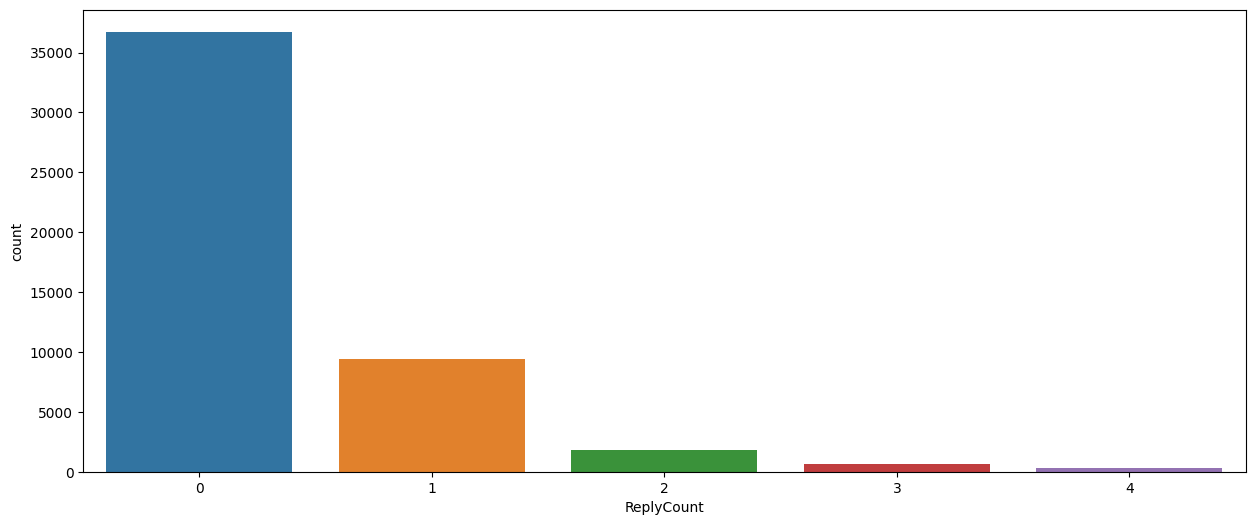

In [30]:
plt.figure(figsize=(15,6))  # Create a figure with a width of 15 inches and a height of 6 inches for the plot

# Create a countplot using seaborn, which displays the counts of each unique value in the 'ReplyCount' column of the 'df' DataFrame
# The 'order' parameter specifies the order of the bars on the x-axis based on the counts of each unique value in descending order
sns.countplot(data=df, x='ReplyCount', order=df["ReplyCount"].value_counts().index[:5])

plt.show()  # Display the plot

In [24]:
df['RetweetCount'].unique()

array([   0,    1,    5,    6,  542,   40,   49,   18,    3,    2,   16,
          4,  112,   39,   36, 1094,   12, 6815,   10,   20,    7,   58,
         23,   11,   15,   45,   37,    8,   31,   19,  160,   27,    9,
         38,   34,   14,  125,   17,   74,  461,   68,   26,   13, 2627,
         47,   53,   88,   21,   25,  221,  334,   50,   30,   22,  252,
         33,  713,  597,   76,   43,   28,  227, 1732,   66,   98,  136,
         92,  114,  730,   64,   24,  202, 1874,   67,   29,  186,  118,
         97,   52,  108, 2463,   59,   32,   93,   35,   56,  564, 3987,
        170,   55,  257, 1307,   95,   62,   44,   57,   89,   54,   83,
        222,  337,  236,  376,  121, 1533,  458,   78,   61,   51, 2203,
         70,  428,   42,  140,   46, 1534,  164,  162,  213,  139,  289,
       1113,   48,  418,  206,  107,  148,   99,  516,   41,  452,  630,
        176,   79,   69,  679, 2082,  248])

In [25]:
df['ReplyCount'].value_counts()

0      36736
1       9430
2       1801
3        653
4        333
       ...  
45         1
147        1
106        1
166        1
331        1
Name: ReplyCount, Length: 108, dtype: int64

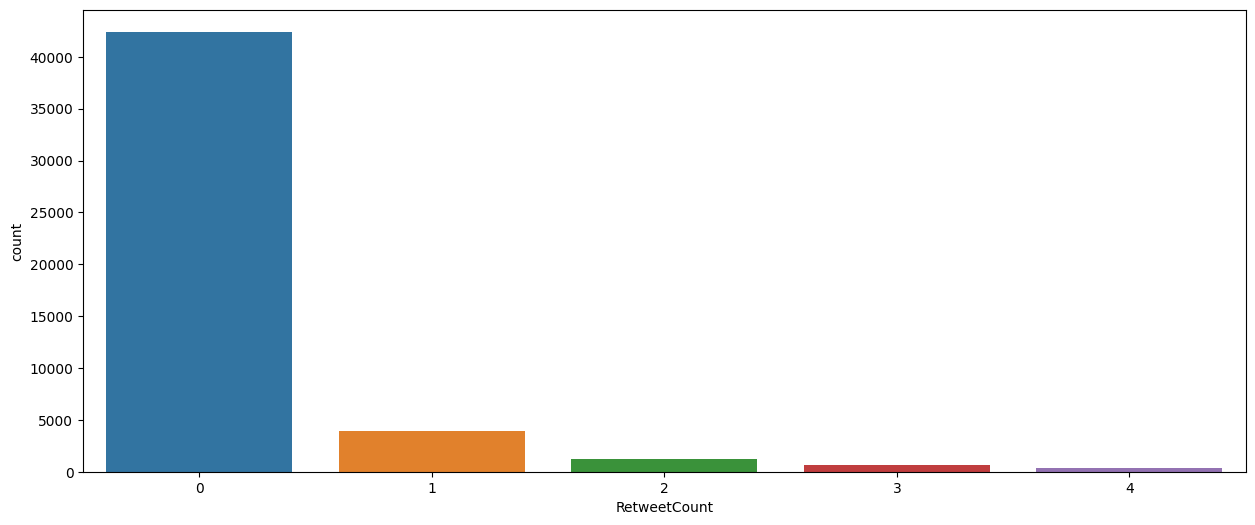

In [29]:
plt.figure(figsize=(15,6)) # Creating a new figure with a size of 15x6 inches

# The 'order' parameter specifies the order of the bars based on the count of values in the 'RetweetCount' column
# The 'index[:5]' part selects the top 5 most frequent values in the 'RetweetCount' column as the order
sns.countplot(data=df, x='RetweetCount', order=df['RetweetCount'].value_counts().index[:5])

plt.show() # Displaying the plot

In [32]:
df['LikeCount'].unique()

array([    5,     4,     2,     1,     0,     3,    66,    20,  9125,
           7,   348,   607,    11,     9,   404,     8,     6,    68,
         329,    10,    17,    15,  1905,   211,    16,    22,    14,
         381,    13,  5682,    42,   190,    57, 56073,    26,    38,
          30,    97,    24,    19,    12,    50,    18,    29,    51,
          33,    41,    55,    44,   663,    75,    54,    39,    21,
          37,   252,    40,    47,   390,    87,   177,    23,    84,
          28,    31,   131,   251,    86,  1055,   171,    65,   144,
          58,   111,    71,    74,   127,    36,    32,   234,   654,
         222,   711,  3952,    43,    46,   273,   168,   349,   239,
         118,   112,    64,    27,   228,    25,    56,   186,    93,
       12557,   733,    98,    61,    35,   100,   147,   322,    49,
         383,   189,    67,    45,    34,   135,   132,   113,    76,
         759,   165,   164,    48,    72,   220,   107,  1608,  2250,
         302,    73,

In [34]:
df['LikeCount'].value_counts()

0      27141
1       9490
2       3873
3       2086
4       1241
       ...  
242        1
202        1
347        1
404        1
424        1
Name: LikeCount, Length: 366, dtype: int64

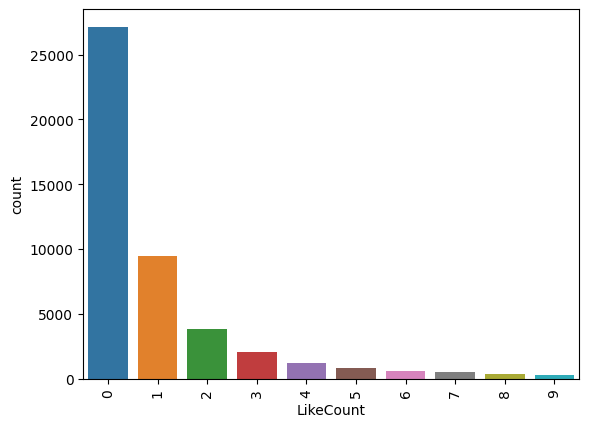

In [35]:
# x-axis is set to 'LikeCount'
# The order of x-axis categories is determined by the top 10 most frequent values of 'LikeCount'
sns.countplot(data=df, x='LikeCount', order=df["LikeCount"].value_counts().index[:10])

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [37]:
df['QuoteCount'].unique()

array([   0,    1,    2,   15,    6,    8,    3,   14,   45, 1947,    9,
          4,    5,   23,  110,  726,   11,   27,    7,   87,   10,  126,
         16,   22,  205,  298,   13,   80,   38,   81,   29,   24,   12,
        495,  216,   25,   37,   57,   48,   19,  413,   18,  374,   20,
         60,   46,   21,   42,   17,   55,  456])

In [38]:
df['QuoteCount'].value_counts()

0       47665
1        1575
2         337
3         147
4          70
5          34
7          28
6          23
9          16
8          13
10         13
11         10
12          8
27          6
14          5
25          4
15          4
24          3
16          3
37          2
19          2
60          2
29          2
38          2
57          1
48          1
21          1
413         1
46          1
374         1
20          1
55          1
17          1
42          1
18          1
298         1
216         1
495         1
81          1
80          1
13          1
205         1
22          1
126         1
87          1
726         1
110         1
23          1
1947        1
45          1
456         1
Name: QuoteCount, dtype: int64

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 6))

# Set 'x' to 'QuoteCount' to specify the column to be plotted on the x-axis
# Use 'order' to specify the order of the bars based on the value counts of 'QuoteCount' column
# Retrieve the top 3 most frequent values of 'QuoteCount' column using 'value_counts().index[:3]'
sns.countplot(data=df, x='QuoteCount', order=df["QuoteCount"].value_counts().index[:3])

# Show the plot
plt.show()


In [39]:
df['Language'].unique()

array(['ja', 'en', 'de', 'tr', 'pl', 'fr', 'es', 'pt', 'lo', 'no', 'ca',
       'zh', 'qme', 'th', 'ne', 'ko', 'und', 'nl', 'fa', 'it', 'da', 'fi',
       'eu', 'hi', 'ar', 'sv', 'in', 'ru', 'qht', 'tl', 'hu', 'cs', 'uk',
       'iw', 'et', 'cy', 'bg', 'ht', 'el', 'vi', 'sl', 'kn', 'ro', 'lt',
       'ur', 'zxx', 'ml', 'mr', 'lv', 'gu', 'qam', 'is', 'ta', 'te', 'pa',
       'sd', 'am', 'sr', 'hy', 'or', 'bn'], dtype=object)

In [40]:
df['Language'].value_counts()

en    32076
ja     5046
es     3315
fr     2492
de     1207
      ...  
sd        1
am        1
hy        1
or        1
bn        1
Name: Language, Length: 61, dtype: int64

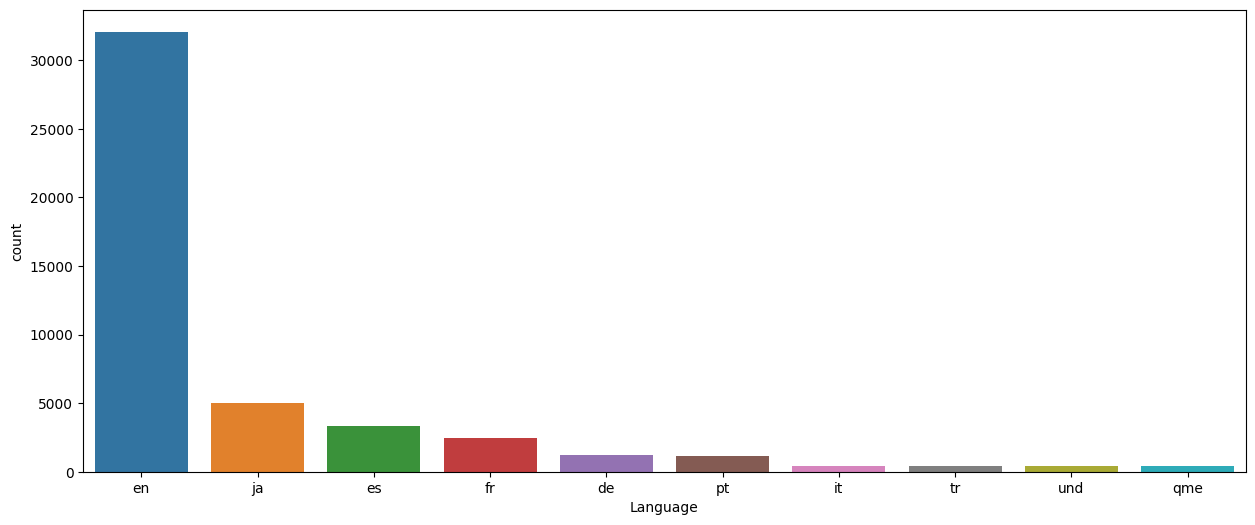

In [41]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Language', order=df['Language'].value_counts().index[:10])
plt.show()

In [42]:
df['Source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
       '<a href="https://nowtice.net/" rel="nofollow">nowtice_news</a>',
       '<a href="https://smarterqueue.com" rel="nofollow">SmarterQueue</a>',
       '<a href="https://github.com/M157q/py-feedr" rel="nofollow">py-feedr-M157q</a>',
       '<a href="http://www.linkedin.com/" rel="nofollow">LinkedIn</a>',
       '<a href="https://soccerstream.org/" rel="nofollow">testttewet</a>',
       '<a href="http://publicize.wp.com/" rel="nofollow">Jetpack.com</a>',
       '<a href="https://contentstudio.io" rel="nofollow">ContentStudio.io</a>',


In [43]:
df['Source'].value_counts()

<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                 17814
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      12281
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>     8972
<a href="https://ifttt.com" rel="nofollow">IFTTT</a>                                     1383
<a href="https://dlvrit.com/" rel="nofollow">dlvr.it</a>                                  959
                                                                                        ...  
<a href="https://www.oliberal.com/" rel="nofollow">bot_twitter_oliberal</a>                 1
<a href="http://www.google.com" rel="nofollow">hogeeee</a>                                  1
<a href="https://google.com" rel="nofollow">bdtw</a>                                        1
<a href="https://euwatch.live" rel="nofollow">EUwatch</a>                                   1
<a href="http://twmode.sf.net/" rel="nofollow">twmode</a>   

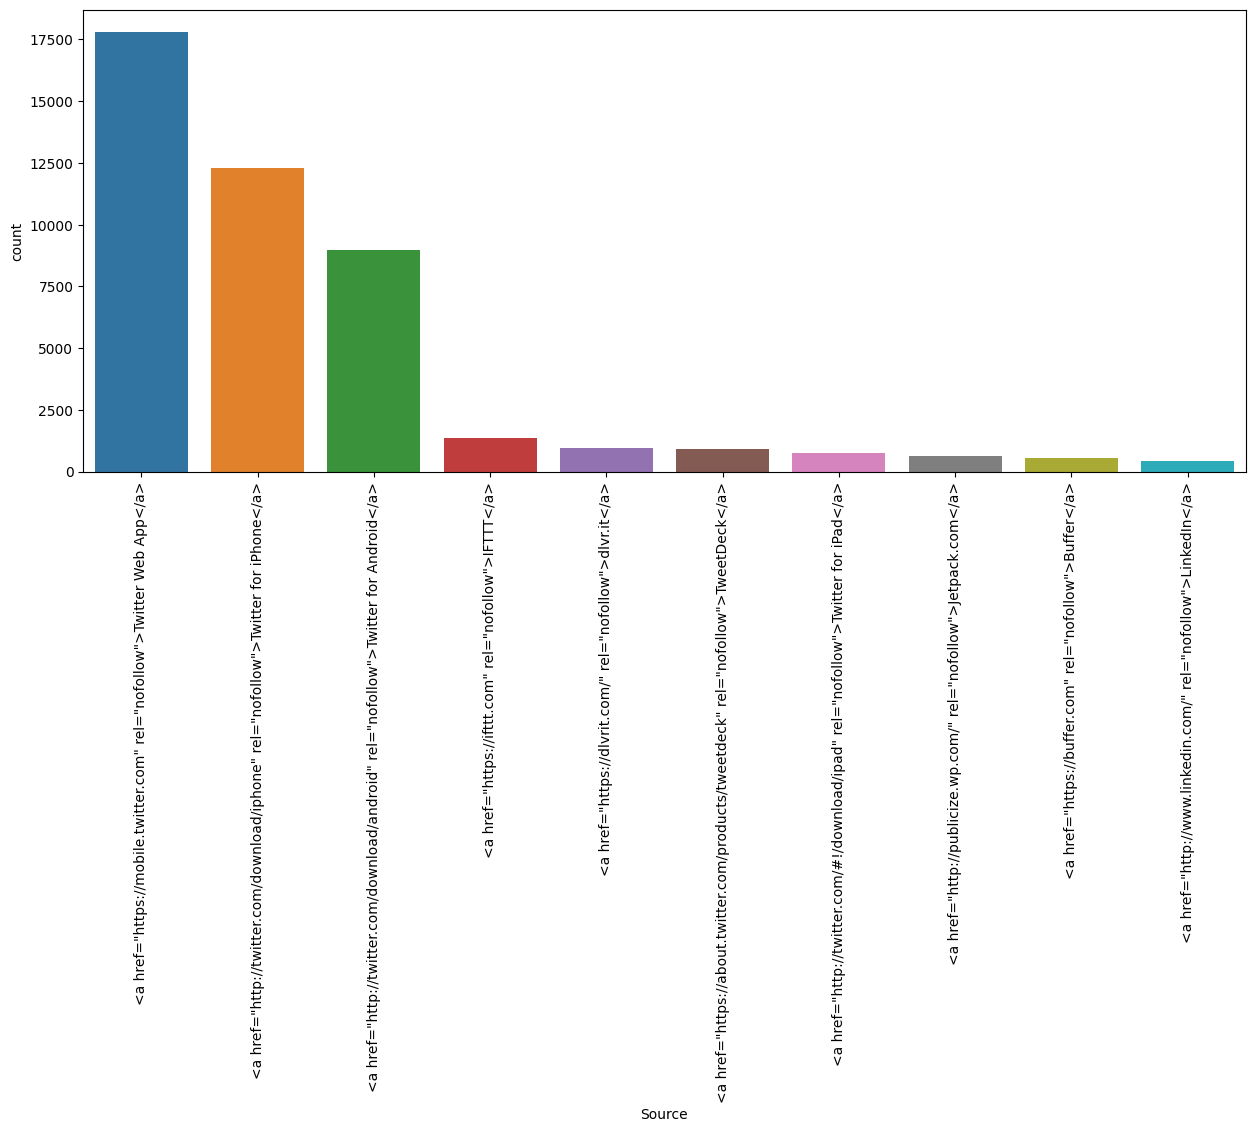

In [44]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Source', order=df["Source"].value_counts().index[:10])
plt.xticks(rotation = 90)
plt.show()

In [45]:
df['hastag_counts'].unique()

array([ 0,  1,  2,  4, 11,  5,  3, 10, 15,  8, 12,  9,  6,  7, 13, 14, 16,
       23, 20, 18, 21, 24, 22, 25, 17, 28, 19])

In [47]:
df['hastag_counts'].value_counts()

0     36414
1      5516
2      2772
3      1944
4      1150
5       651
6       396
7       295
8       229
9       124
10       98
13       76
11       69
12       51
15       44
16       43
14       41
18       25
17       14
23        9
19        9
25        8
21        7
20        7
24        6
22        2
28        1
Name: hastag_counts, dtype: int64

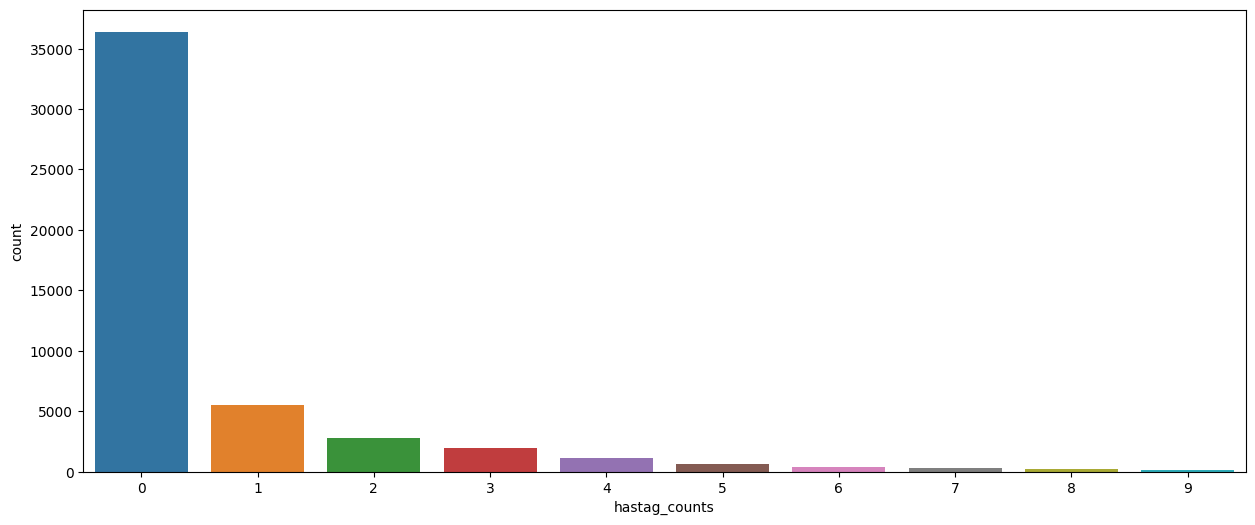

In [48]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='hastag_counts',order=df['hastag_counts'].value_counts().index[:10])
plt.show()

In [49]:
# Importing necessary libraries
from wordcloud import WordCloud, STOPWORDS # For generating word clouds and handling stopwords
from sklearn.decomposition import LatentDirichletAllocation # For performing Latent Dirichlet Allocation (LDA) topic modeling
from collections import Counter # For counting occurrences of items in a collection
from nltk.sentiment import SentimentIntensityAnalyzer # For performing sentiment analysis using NLTK
from textblob import TextBlob # For performing text analysis tasks such as part-of-speech tagging and sentiment analysis using TextBlob library


In [54]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 

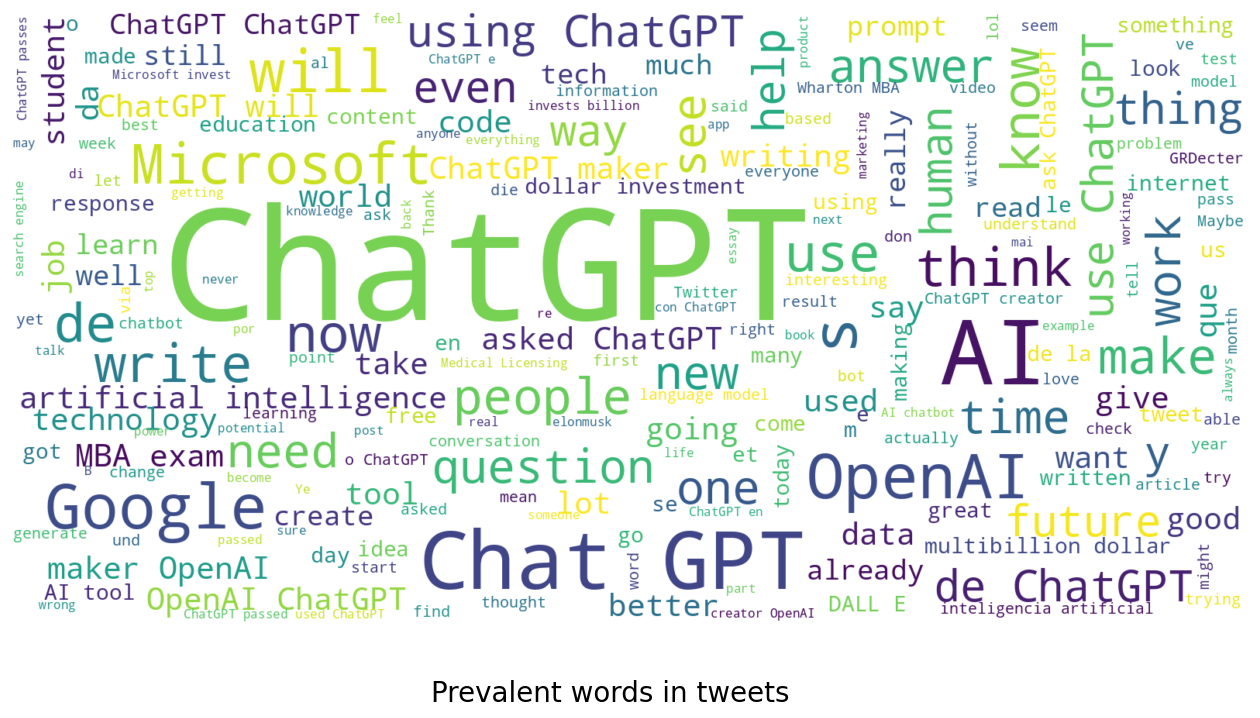

In [55]:
show_wordcloud(df['Text'], title = 'Prevalent words in tweets')

In [56]:
df['Datetime']=pd.to_datetime(df['Datetime'])

In [57]:
df['year'] = df['Datetime'].dt.year
df['month']=df['Datetime'].dt.month
df['day']=df['Datetime'].dt.day 
df['dayofweek']=df['Datetime'].dt.dayofweek
df['hour']=df['Datetime'].dt.hour
df['minute']=df['Datetime'].dt.minute
df['dayofyear']=df['Datetime'].dt.dayofyear
df['date_only']=df['Datetime'].dt.date

In [60]:
tweets_agg_df = df.groupby(['date_only'])['Text'].count().reset_index()
tweets_agg_df.columns=['date_only','count']

In [69]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    # Set the seaborn style to whitegrid
    sns.set(style="whitegrid")
    
    # Set custom context parameters for paper style
    paper_rc = {'lines.linewidth': 3, 'lines.markersize': 20}
    sns.set_context("paper", rc=paper_rc)
    
    # Create a subplots with a single axis
    f, ax = plt.subplots(1, 1, figsize=(4*size, 3*size))
    
    # Create a line plot using seaborn with x, y, and hue parameters
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    
    # Rotate x-axis labels by 90 degrees for better visibility
    plt.xticks(rotation=90)
    
    # Set title based on whether hue is present or not
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    
    # Set y-axis scale to log scale if is_log parameter is True
    if(is_log):
        ax.set(yscale="log")
    
    # Add dotted black grid to the plot
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    
    # Display the plot
    plt.show()


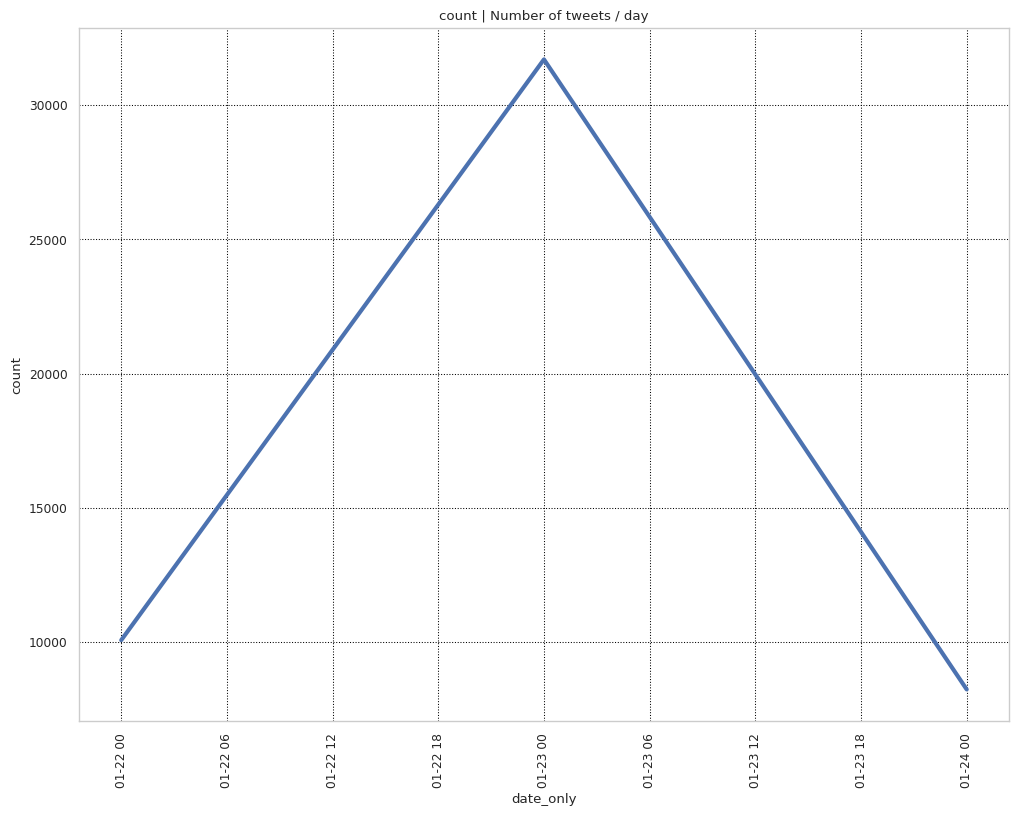

In [70]:
plot_time_variation(tweets_agg_df, x='date_only', title="Number of tweets / day",size=3)

In [71]:
df['dayofweek'].unique()

array([6, 0, 1])

In [72]:
df['dayofweek'].value_counts()

0    31700
6    10068
1     8233
Name: dayofweek, dtype: int64

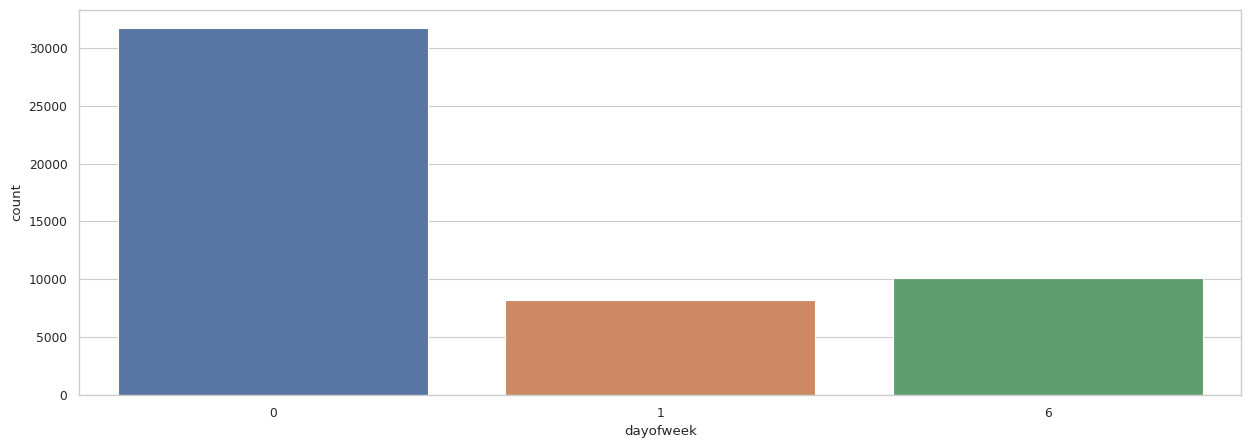

In [77]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='dayofweek')
plt.show()

In [78]:
df['dayofyear'].unique()

array([22, 23, 24])

In [79]:
df['dayofyear'].value_counts()

23    31700
22    10068
24     8233
Name: dayofyear, dtype: int64

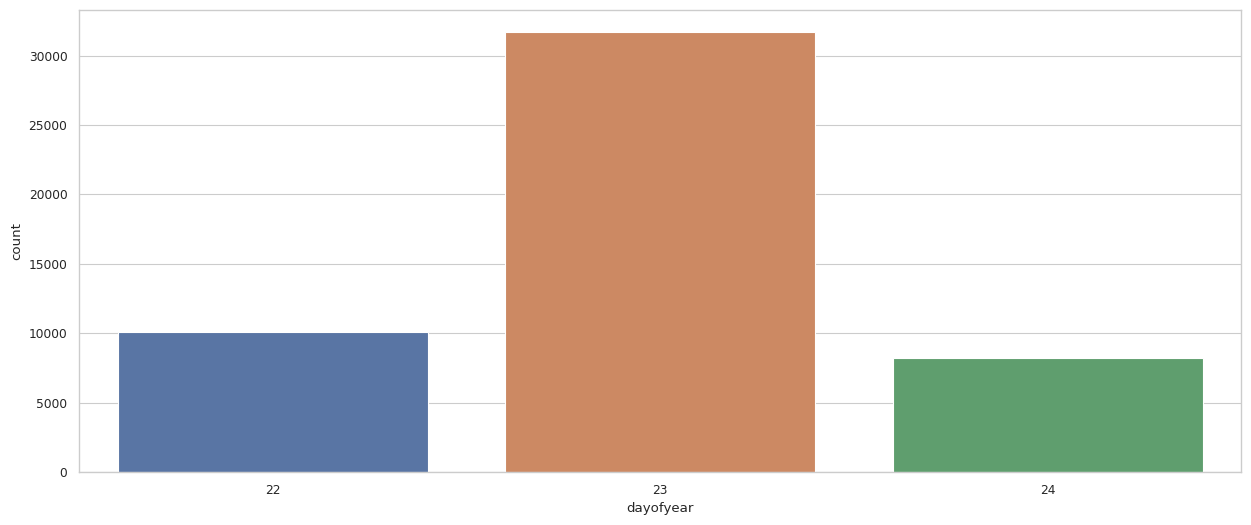

In [80]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='dayofyear')
plt.show()

In [81]:
df['date_only'].unique()

array([datetime.date(2023, 1, 22), datetime.date(2023, 1, 23),
       datetime.date(2023, 1, 24)], dtype=object)

In [82]:
df['date_only'].value_counts()

2023-01-23    31700
2023-01-22    10068
2023-01-24     8233
Name: date_only, dtype: int64

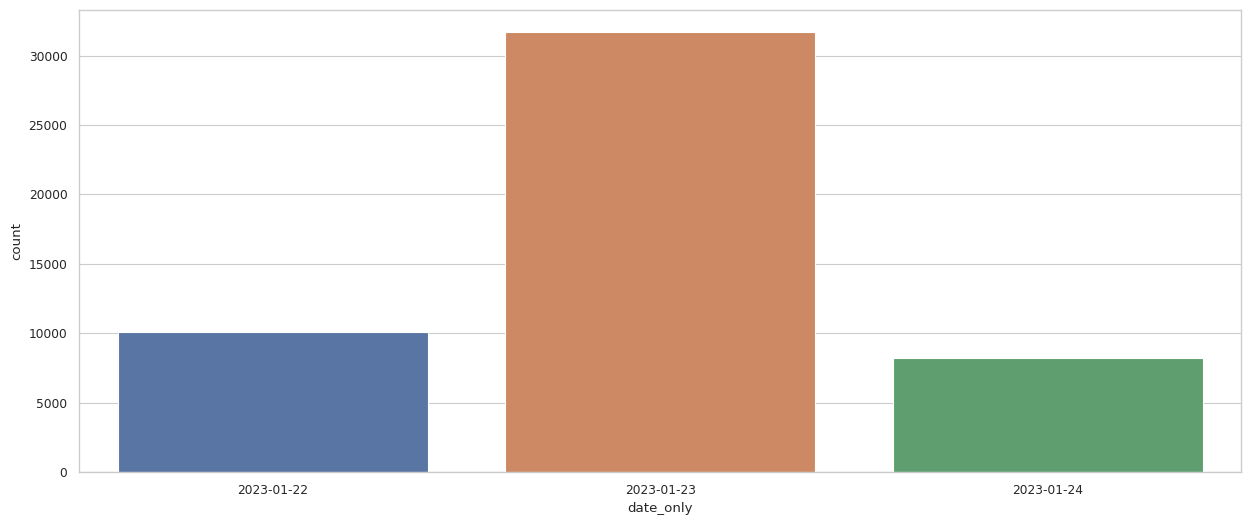

In [83]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='date_only')
plt.show()

In [84]:
df['hour'].unique()

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12])

In [85]:
df['hour'].value_counts()

15    3297
16    3237
14    3178
17    2927
18    2756
19    2604
20    2370
21    2330
22    2158
6     2140
3     2134
5     2105
23    2078
4     2077
2     1994
1     1978
0     1914
13    1765
12    1319
11    1277
10    1161
9     1113
8     1103
7      986
Name: hour, dtype: int64

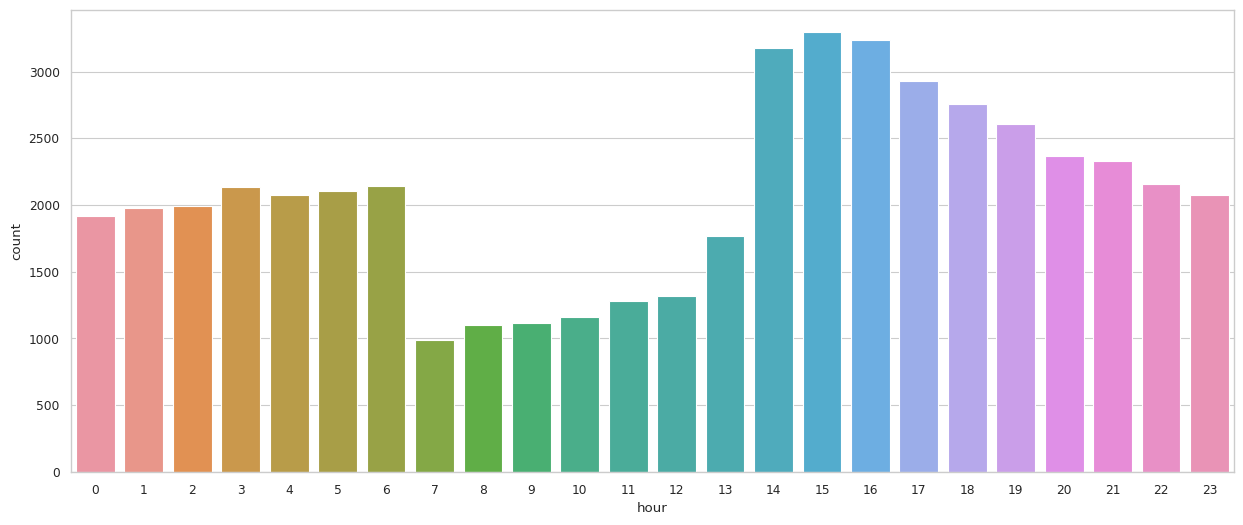

In [86]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='hour')
plt.show()

In [87]:
df['minute'].unique()

array([44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43])

In [88]:
df['minute'].value_counts()

0     1415
30    1168
45     945
15     923
16     907
10     886
1      873
50     868
2      863
58     853
48     853
40     848
55     847
35     845
20     844
28     842
29     841
5      839
3      838
25     834
52     833
18     832
32     830
56     830
17     826
4      822
21     821
6      816
57     815
34     813
41     811
51     811
54     810
36     807
24     806
23     804
59     802
42     801
11     800
9      800
31     799
46     799
27     798
49     797
14     797
47     795
37     794
43     783
33     780
38     780
53     778
19     774
44     772
13     770
7      769
39     766
26     765
22     759
12     755
8      749
Name: minute, dtype: int64

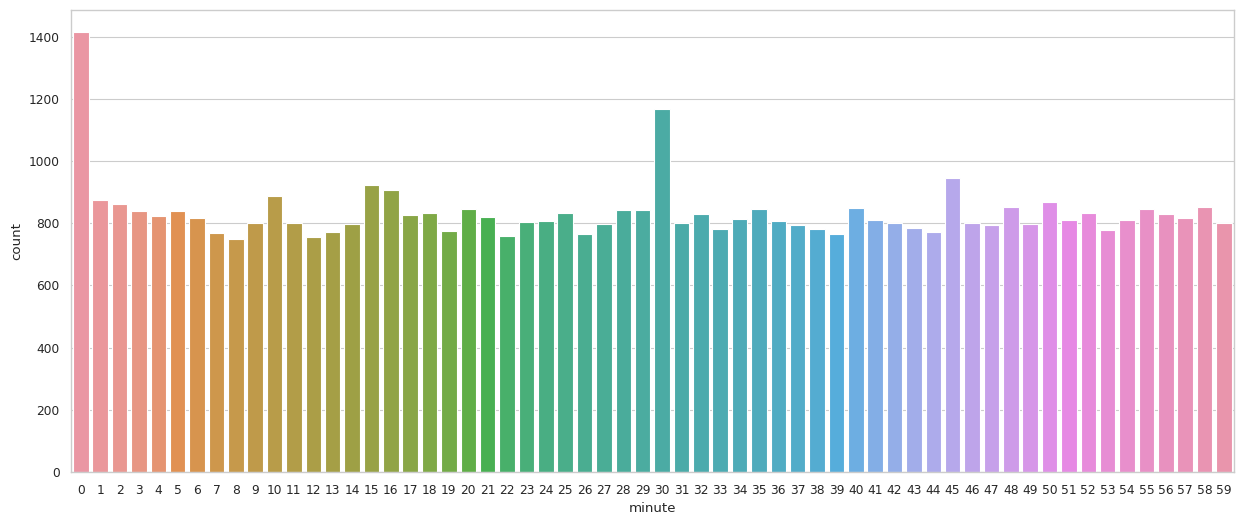

In [89]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='minute')
plt.show()

In [93]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [95]:
# Import SentimentIntensityAnalyzer from the nltk library
sia = SentimentIntensityAnalyzer()

# Define a function called find_sentiment that takes a 'post' parameter as input
def find_sentiment(post):
    try:
        # Calculate the compound score of the 'post' using SentimentIntensityAnalyzer
        # and check if it is greater than 0, indicating positive sentiment
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        # Check if the compound score is less than 0, indicating negative sentiment
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        # If the compound score is neither positive nor negative, classify it as neutral
        else:
            return "Neutral"
    # If an exception occurs during sentiment analysis, classify it as neutral
    except:
        return "Neutral"


In [100]:
def plot_sentiment(df, feature, title):
    # Calculate counts and percentage of each unique value in the specified feature column
    counts = df[feature].value_counts()
    percent = counts / sum(counts)

    # Create a subplot with two axes
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    # Define colors for the bars in the bar plot
    colors = ['green', 'red', 'blue']

    # Create a bar plot of counts on the first axis (ax1)
    counts.plot(kind='bar', ax=ax1, color=colors)

    # Create a bar plot of percentage on the second axis (ax2)
    percent.plot(kind='bar', ax=ax2, color=colors)

    # Set y-axis labels for both axes
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage: {title} sentiments', size=12)

    # Set a super title for the plot
    plt.suptitle(f'Sentiment analysis: {title}')

    # Adjust the layout of the plot to avoid overlapping
    plt.tight_layout()

    plt.show()


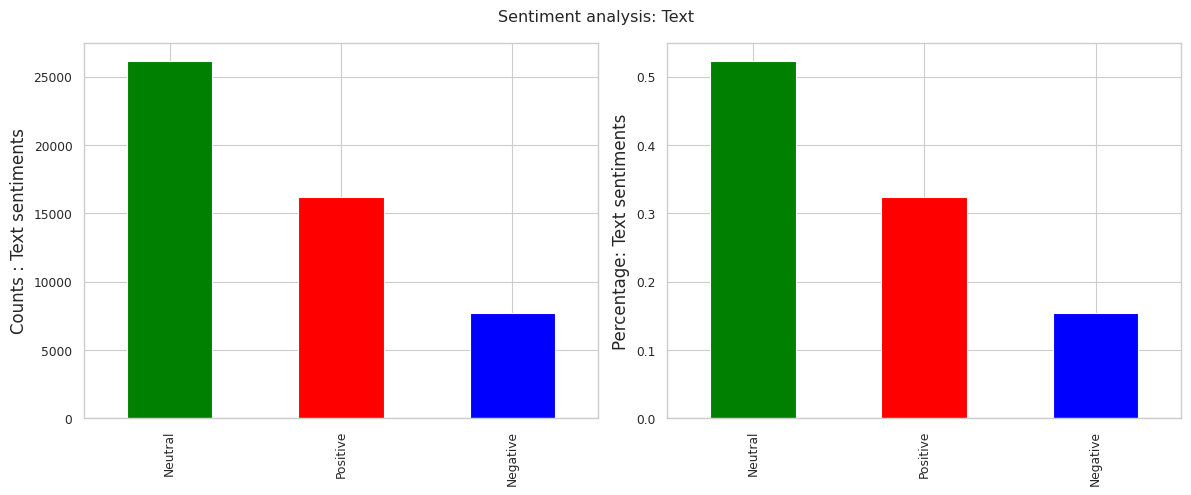

In [101]:
df['text_sentiment'] =df['Text'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'Text')

In [103]:
tweets_agg_df = df.groupby(["date_only", "text_sentiment"])["Text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "text_sentiment", "count"]

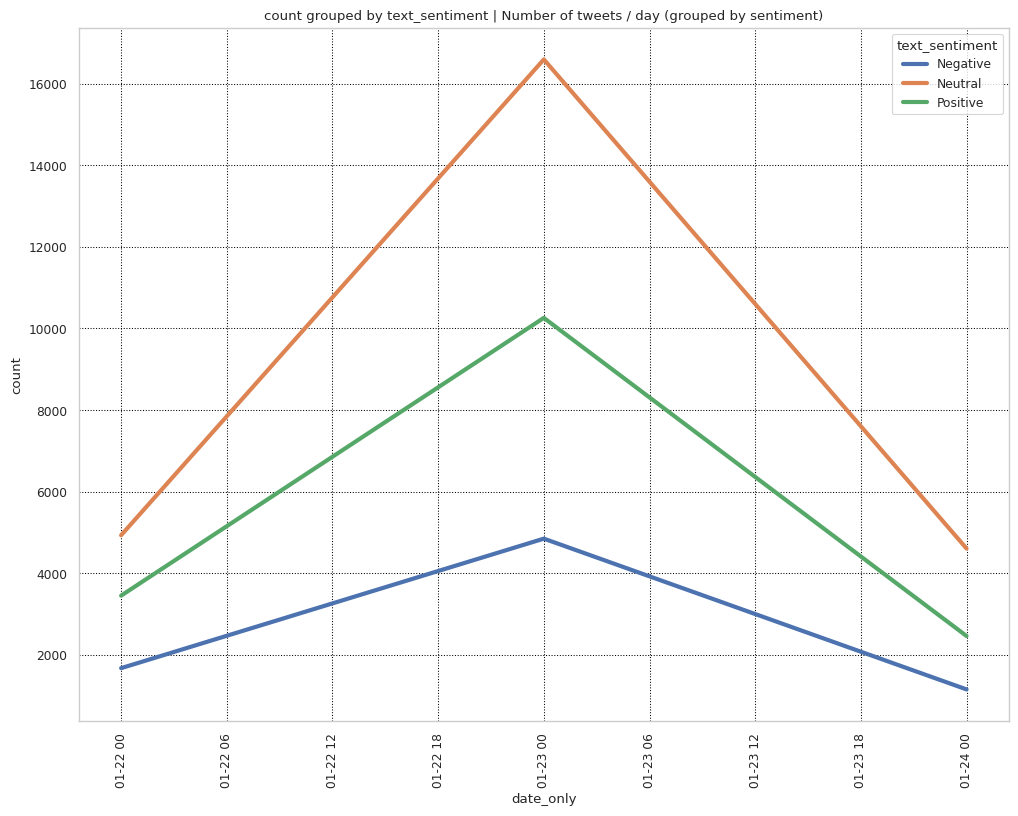

In [104]:
plot_time_variation(tweets_agg_df, x='date_only', hue="text_sentiment", title="Number of tweets / day (grouped by sentiment)",size=3)

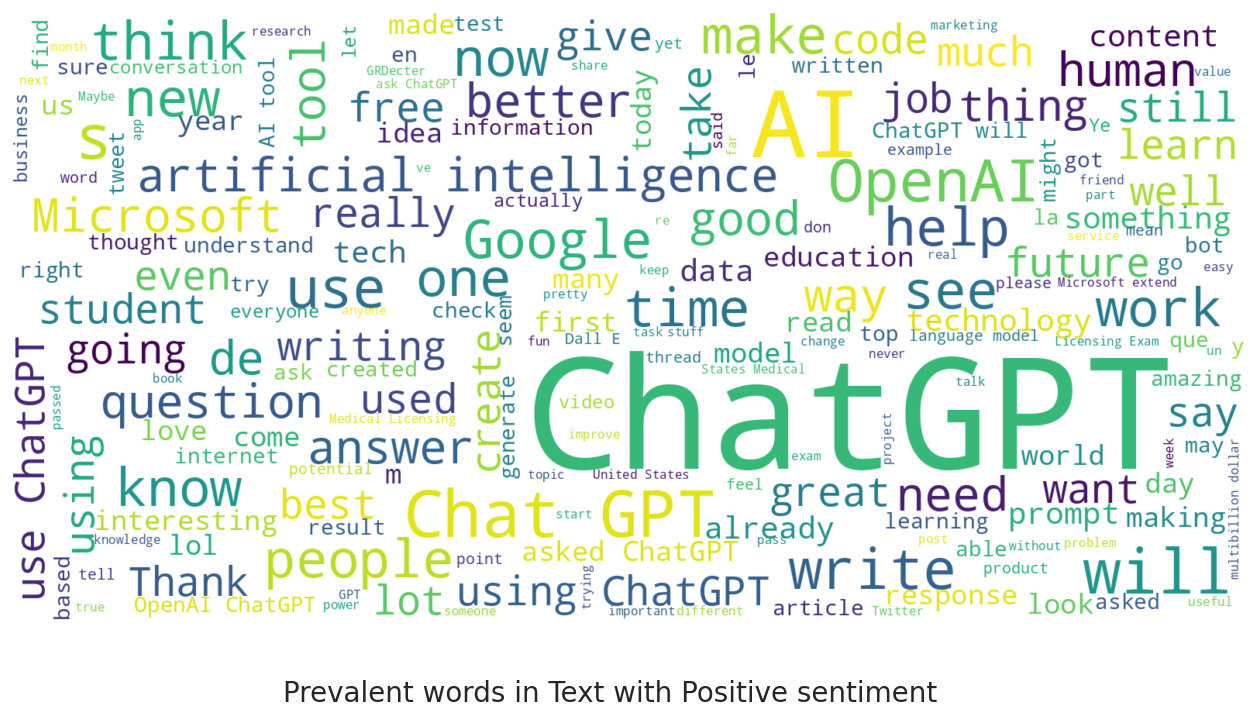

In [105]:
show_wordcloud(df.loc[df['text_sentiment']=="Positive", 'Text'], title = 'Prevalent words in Text with Positive sentiment', mask=None)

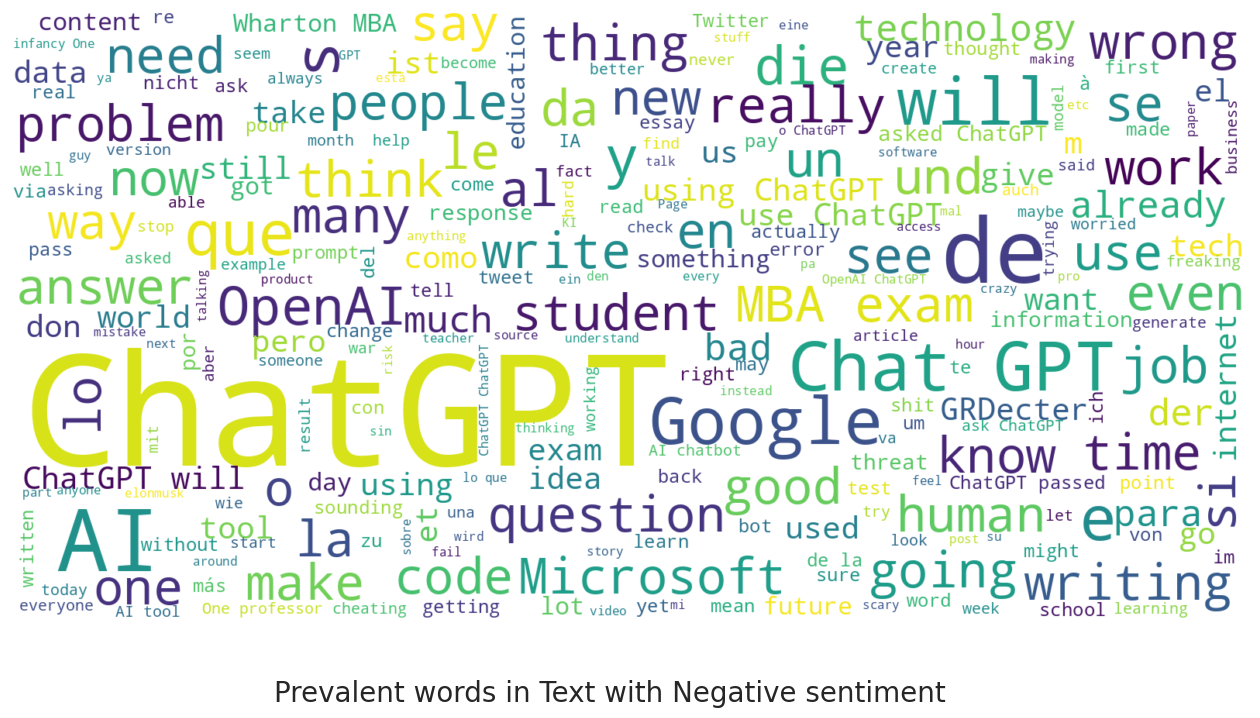

In [106]:
show_wordcloud(df.loc[df['text_sentiment']=="Negative", 'Text'], title = 'Prevalent words in Text with Negative sentiment', mask=None)

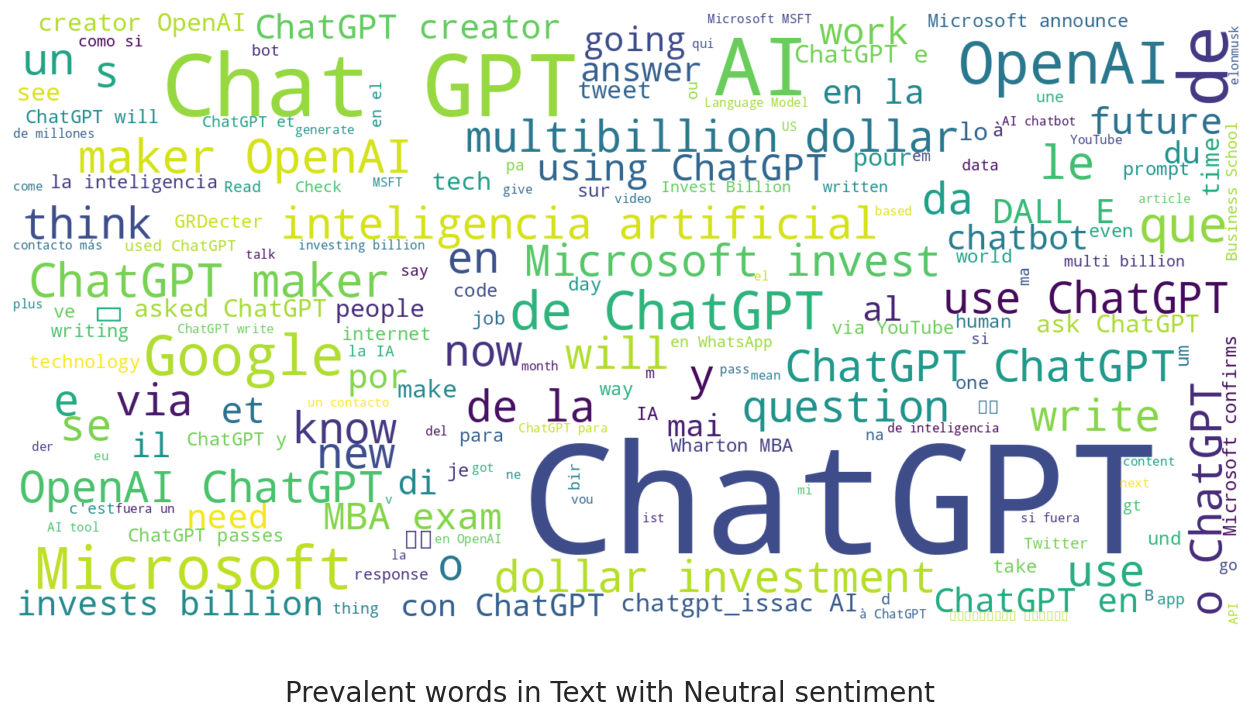

In [107]:
show_wordcloud(df.loc[df['text_sentiment']=="Neutral", 'Text'], title = 'Prevalent words in Text with Neutral sentiment', mask=None)